In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.dpi': 120,
    'savefig.dpi': 300,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--'
})

COLORS = {
    'primary': '#2C3E50',
    'secondary': '#34495E',
    'accent': '#3498DB',
    'success': '#27AE60',
    'warning': '#F39C12',
    'danger': '#E74C3C',
    'light': '#95A5A6'
}

---
## 1. Road Surface Analysis: Pothole Size Distribution

The following chart presents the distribution of potholes categorized by size. This classification is essential for **prioritizing maintenance efforts** and **budget allocation** for road repairs.

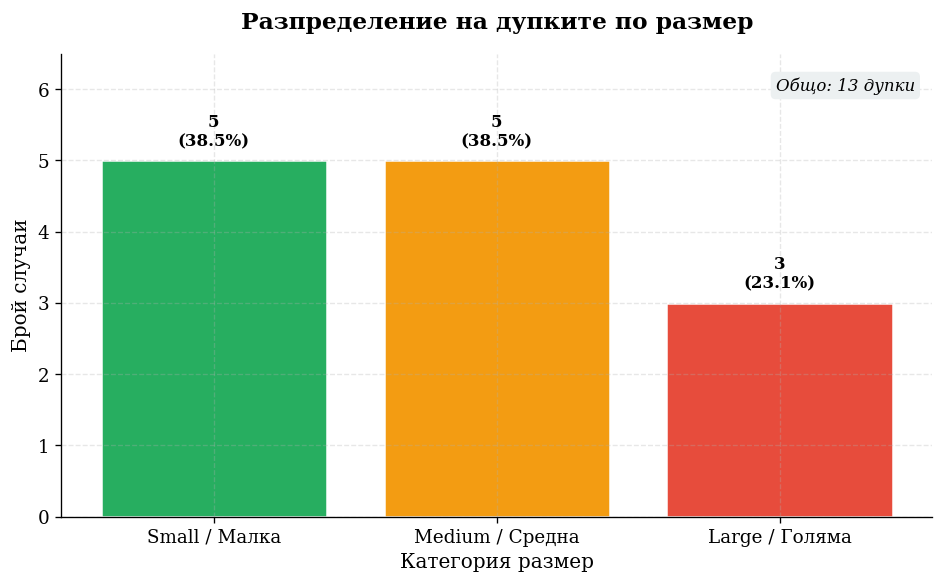

In [11]:
hole_sizes_data = {
    "Small / Малка": 5,
    "Medium / Средна": 5,
    "Large / Голяма": 3
}

hole_types = list(hole_sizes_data.keys()) # [key for key in hole_sizes_data.keys()]
hole_values = np.array(list(hole_sizes_data.values())) # np.array([val for val in hole_sizes_data.values()])
total_holes = hole_values.sum()

fig, ax = plt.subplots(figsize=(8, 5))
colors = [COLORS['success'], COLORS['warning'], COLORS['danger']]
bars = ax.bar(hole_types, hole_values, color=colors, edgecolor='white', linewidth=1.5)

for bar, val in zip(bars, hole_values):
    height = bar.get_height()
    percentage = (val / total_holes) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.15, f'{int(val)}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Категория размер', fontsize=12)
ax.set_ylabel('Брой случаи', fontsize=12)
ax.set_title('Разпределение на дупките по размер', pad=15)
ax.set_ylim(0, max(hole_values) + 1.5)

ax.annotate(f'Общо: {total_holes} дупки', xy=(0.98, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=10, style='italic', bbox=dict(boxstyle='round,pad=0.3', facecolor='#ECF0F1', edgecolor='none'))

plt.tight_layout()
plt.show()

---
## 2. Safety Assessment: Danger Level Classification

Infrastructure hazards are categorized into five danger levels, from *Very Low* to *Very High*. This classification enables authorities to **prioritize interventions** based on public safety risk.

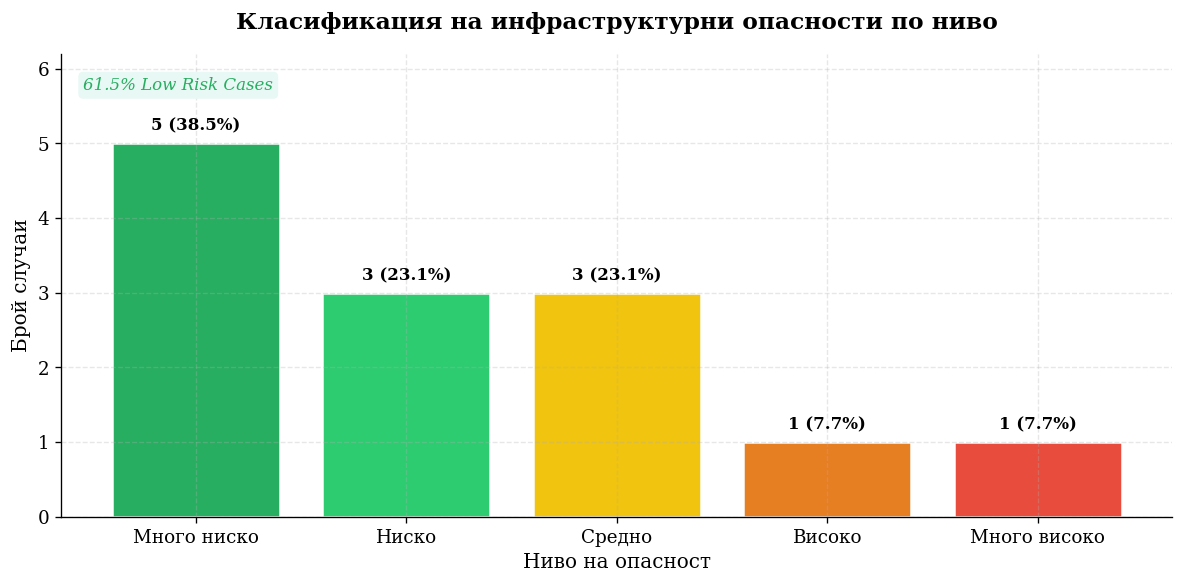

In [12]:
danger_levels_data = {
    "Много ниско": 5,
    "Ниско": 3,
    "Средно": 3,
    "Високо": 1,
    "Много високо": 1
}

danger_types = list(danger_levels_data.keys()) # [key for key in danger_levels_data.keys()]
danger_values = np.array(list(danger_levels_data.values())) # np.array([val for val in danger_levels_data.values()])
total_danger = danger_values.sum()

danger_colors = ['#27AE60', '#2ECC71', '#F1C40F', '#E67E22', '#E74C3C']

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(danger_types, danger_values, color=danger_colors, edgecolor='white', linewidth=1.5)

for bar, val in zip(bars, danger_values):
    height = bar.get_height()
    percentage = (val / total_danger) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.12, f'{int(val)} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Ниво на опасност', fontsize=12)
ax.set_ylabel('Брой случаи', fontsize=12)
ax.set_title('Класификация на инфраструктурни опасности по ниво', pad=15)
ax.set_ylim(0, max(danger_values) + 1.2)

low_risk = ((danger_values[0] + danger_values[1]) / total_danger) * 100
ax.annotate(f'{low_risk:.1f}% Low Risk Cases', xy=(0.02, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=10, style='italic', color=COLORS['success'], bbox=dict(boxstyle='round,pad=0.3', facecolor='#E8F8F5', edgecolor='none'))

plt.tight_layout()
plt.show()

---
## 3. Road Network Analysis: Infrastructure by Road Type

This visualization shows the distribution of reported infrastructure issues across different road classifications. Understanding this distribution helps in **resource allocation** across the road network hierarchy.

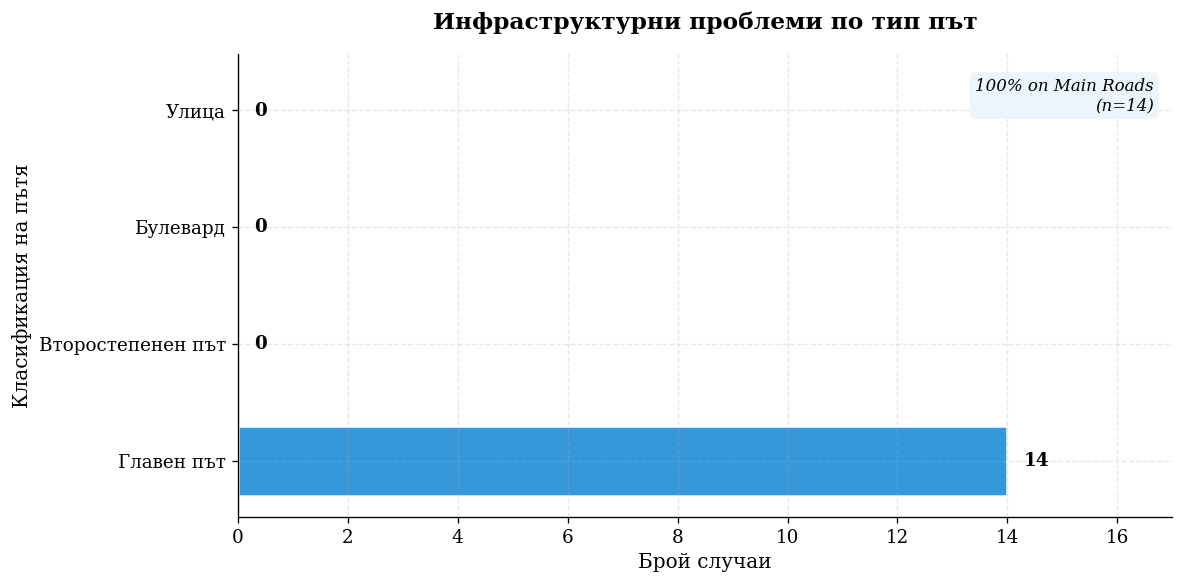

In [14]:
road_types_data = {
    "Главен път": 14,
    "Второстепенен път": 0,
    "Булевард": 0,
    "Улица": 0
}

road_names = list(road_types_data.keys()) # [key for key in road_types_data.keys()]
road_values = np.array(list(road_types_data.values())) # np.array([val for val in road_types_data.values()])
total_roads = road_values.sum()

fig, ax = plt.subplots(figsize=(10, 5))
colors = [COLORS['accent'] if v > 0 else COLORS['light'] for v in road_values]
bars = ax.barh(road_names, road_values, color=colors, edgecolor='white', linewidth=1.5, height=0.6)

for bar, val in zip(bars, road_values):
    width = bar.get_width()
    label = f'{int(val)}' if val > 0 else '0'
    x_pos = width + 0.3 if val > 0 else 0.3
    ax.text(x_pos, bar.get_y() + bar.get_height()/2, label, ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Брой случаи', fontsize=12)
ax.set_ylabel('Класификация на пътя', fontsize=12)
ax.set_title('Инфраструктурни проблеми по тип път', pad=15)
ax.set_xlim(0, max(road_values) + 3)

ax.annotate(f'100% on Main Roads\n(n={total_roads})', xy=(0.98, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=10, style='italic', bbox=dict(boxstyle='round,pad=0.3', facecolor='#EBF5FB', edgecolor='none'))

plt.tight_layout()
plt.show()

---
## 4. Street Lighting Analysis: Operational Status

The operational status of street lighting infrastructure is critical for **public safety** and **energy management**. This chart shows the current functional state of surveyed light poles.

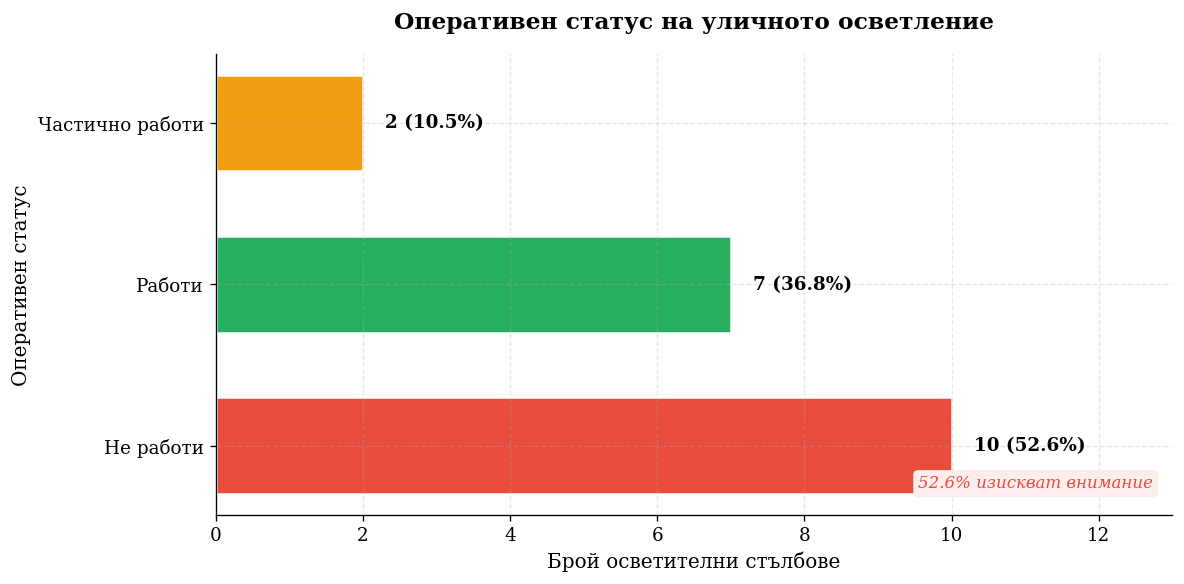

In [15]:
lightpole_working_statuses_data = {
    "Не работи": 10,
    "Работи": 7,
    "Частично работи": 2
}

lightpole_statuses = list(lightpole_working_statuses_data.keys()) # [key for key in lightpole_working_statuses_data.keys()]
lightpole_values = np.array(list(lightpole_working_statuses_data.values())) # np.array([val for val in lightpole_working_statuses_data.values()])
total_poles = lightpole_values.sum()

status_colors = [COLORS['danger'], COLORS['success'], COLORS['warning']]

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(lightpole_statuses, lightpole_values, color=status_colors, edgecolor='white', linewidth=1.5, height=0.6)

for bar, val in zip(bars, lightpole_values):
    width = bar.get_width()
    percentage = (val / total_poles) * 100
    ax.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{int(val)} ({percentage:.1f}%)', ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Брой осветителни стълбове', fontsize=12)
ax.set_ylabel('Оперативен статус', fontsize=12)
ax.set_title('Оперативен статус на уличното осветление', pad=15)
ax.set_xlim(0, max(lightpole_values) + 3)

non_functional = ((lightpole_values[0]) / total_poles) * 100
ax.annotate(f'{non_functional:.1f}% изискват внимание', xy=(0.98, 0.05), xycoords='axes fraction', ha='right', va='bottom', fontsize=10, style='italic', color=COLORS['danger'], bbox=dict(boxstyle='round,pad=0.3', facecolor='#FDEDEC', edgecolor='none'))

plt.tight_layout()
plt.show()

---
## 5. Physical Infrastructure: Light Pole Condition Assessment

Beyond operational status, the **physical condition** of light poles is assessed to identify structural maintenance needs and replacement priorities.

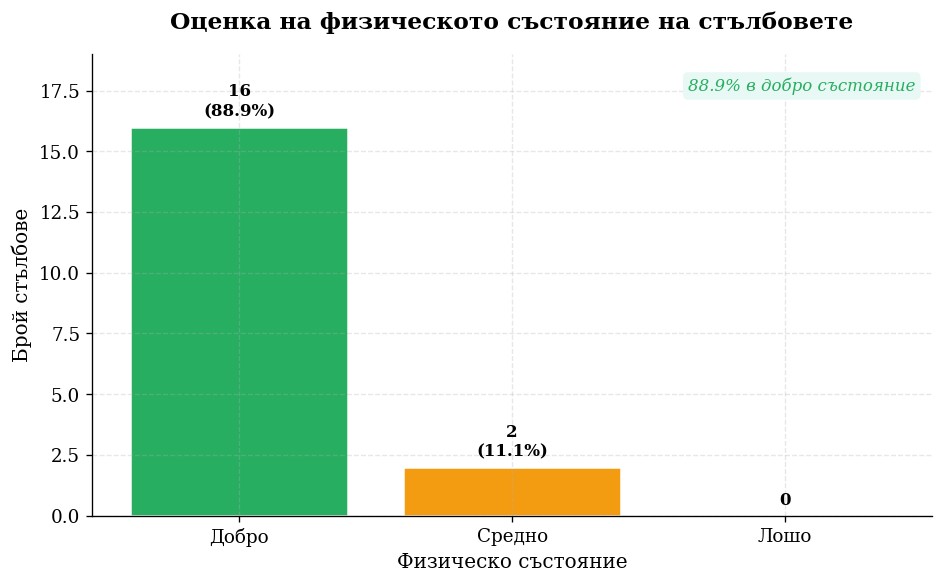

In [16]:
pole_conditions_data = {
    "Добро": 16,
    "Средно": 2,
    "Лошо": 0
}

pole_condition_types = list(pole_conditions_data.keys())
pole_condition_values = np.array(list(pole_conditions_data.values()))
total_condition = pole_condition_values.sum()

condition_colors = [COLORS['success'], COLORS['warning'], COLORS['danger']]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(pole_condition_types, pole_condition_values, color=condition_colors, edgecolor='white', linewidth=1.5)

for bar, val in zip(bars, pole_condition_values):
    height = bar.get_height()
    percentage = (val / total_condition) * 100 if total_condition > 0 else 0
    label = f'{int(val)}\n({percentage:.1f}%)' if val > 0 else '0'
    y_pos = height + 0.3 if val > 0 else 0.3
    ax.text(bar.get_x() + bar.get_width()/2, y_pos, label, ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Физическо състояние', fontsize=12)
ax.set_ylabel('Брой стълбове', fontsize=12)
ax.set_title('Оценка на физическото състояние на стълбовете', pad=15)
ax.set_ylim(0, max(pole_condition_values) + 3)

good_condition = (pole_condition_values[0] / total_condition) * 100
ax.annotate(f'{good_condition:.1f}% в добро състояние', xy=(0.98, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=10, style='italic', color=COLORS['success'], bbox=dict(boxstyle='round,pad=0.3', facecolor='#E8F8F5', edgecolor='none'))

plt.tight_layout()
plt.show()

---
## 6. Illumination Quality: Light Intensity Distribution

Light intensity measurements provide insight into the **quality of illumination** provided by the street lighting infrastructure, which directly impacts visibility and safety.

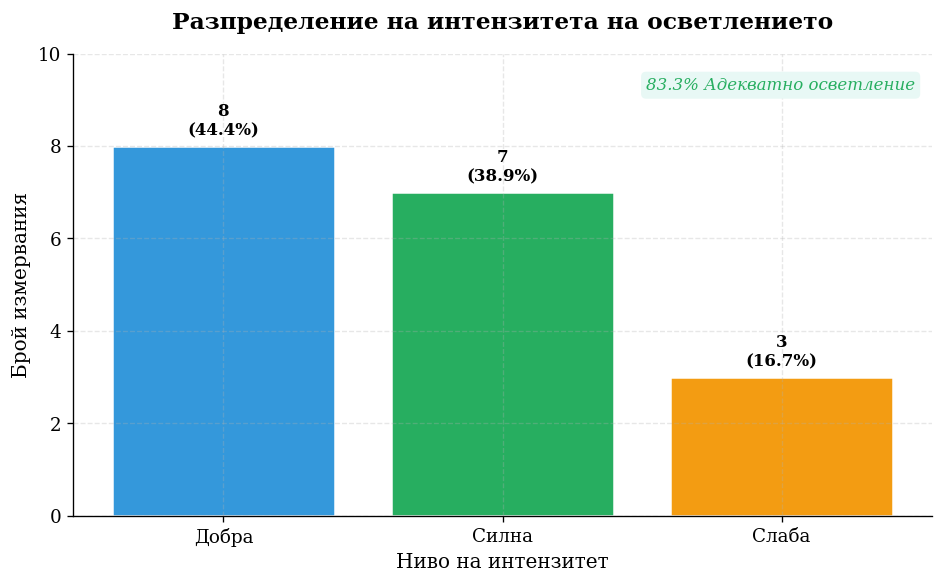

In [17]:
light_intensity_levels_data = {
    "Добра": 8,
    "Силна": 7,
    "Слаба": 3
}

intensity_types = list(light_intensity_levels_data.keys()) # [key for key in light_intensity_levels_data.keys()]
intensity_values = np.array(list(light_intensity_levels_data.values())) # np.array([val for val in light_intensity_levels_data.values()])
total_intensity = intensity_values.sum()

intensity_colors = [COLORS['accent'], COLORS['success'], COLORS['warning']]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(intensity_types, intensity_values, color=intensity_colors, edgecolor='white', linewidth=1.5)

for bar, val in zip(bars, intensity_values):
    height = bar.get_height()
    percentage = (val / total_intensity) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.15, f'{int(val)}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Ниво на интензитет', fontsize=12)
ax.set_ylabel('Брой измервания', fontsize=12)
ax.set_title('Разпределение на интензитета на осветлението', pad=15)
ax.set_ylim(0, max(intensity_values) + 2)

adequate = ((intensity_values[0] + intensity_values[1]) / total_intensity) * 100
ax.annotate(f'{adequate:.1f}% Адекватно осветление', xy=(0.98, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=10, style='italic', color=COLORS['success'], bbox=dict(boxstyle='round,pad=0.3', facecolor='#E8F8F5', edgecolor='none'))

plt.tight_layout()
plt.show()

---
## Summary and Key Findings

### Road Surface Conditions
- **13 potholes** documented across the surveyed area
- Majority classified as Small (38.5%) or Medium (38.5%) size
- **61.5%** of hazards rated as Low or Very Low danger

### Road Network Distribution
- **100%** of reported issues located on main roads
- No issues reported on secondary roads, boulevards, or residential streets

### Street Lighting Infrastructure
- **52.6%** of light poles non-functional, requiring immediate attention
- **88.9%** of poles in good physical condition despite operational issues
- **83.3%** of operational lights provide adequate or strong illumination

### Recommendations
1. **Priority maintenance** should focus on restoring non-functional street lights
2. **Preventive repairs** for medium and large potholes on main roads
3. **Expand monitoring** to secondary roads and residential areas

---
*Report generated from WebGIS infrastructure monitoring data*